In [0]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"

from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [0]:
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar100

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils import to_categorical
from keras.models import load_model
from keras.constraints import maxnorm
from keras.optimizers import SGD
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from itertools import product
from scipy import optimize
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
tf.reset_default_graph()
tf.set_random_seed(343)
np.random.seed(343)
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


169009152/169001437 [==============================] - 8s 0us/step
x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [0]:
import cv2
items = os.listdir('C://Users//koour//Downloads')
print(items)
# for each_image in items:
#   if each_image.endswith(".jpg"):
#     print (each_image)
#     full_path = "/content/" + each_image
#     print (full_path)
#     image = cv2.imread(full_path)
#     print (image)

FileNotFoundError: ignored

In [0]:
x_train.shape

(50000, 3, 32, 32)

In [0]:
y_train.shape

(50000, 1)

In [0]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [0]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

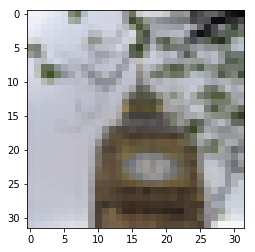

In [0]:
img = x_train[35].reshape(3,32,32).transpose([1, 2, 0])
plt.imshow(img, interpolation='nearest');

In [0]:
y_train[40]

array([78])

In [0]:
# Let's see what values are in the label y_train
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [0]:
x = np.concatenate((x_train,x_test))
y = np.concatenate((y_train,y_test))
print('x shape:', x.shape)
print('y shape:', y.shape)

x shape: (60000, 3, 32, 32)
y shape: (60000, 1)


In [0]:
df=pd.DataFrame(y)
f=df[df[0].isin([22,39,40,86,87,5,20,25,84,94])].index
y=y[f]
#y_train=y_train[f]
#y_train.shape
y.shape

(6000, 1)

In [0]:
x=x[f]
x[1]


array([[[ 83,  67,  61, ...,   9,  16,  35],
        [ 75,  71,  55, ...,  39,   9,  12],
        [ 73,  68,  74, ...,  91,  53,  14],
        ...,
        [159, 150, 191, ..., 152, 173, 122],
        [157, 155, 183, ..., 213, 196, 169],
        [150, 155, 179, ..., 212, 187, 148]],

       [[132, 114, 108, ...,  26,  34,  59],
        [124, 119, 103, ...,  67,  28,  31],
        [121, 115, 122, ..., 132,  83,  34],
        ...,
        [187, 146, 154, ..., 131, 143, 123],
        [171, 133, 152, ..., 168, 146, 157],
        [160, 127, 149, ..., 159, 136, 135]],

       [[178, 160, 154, ...,  57,  66,  94],
        [173, 167, 152, ..., 107,  65,  66],
        [173, 166, 172, ..., 178, 125,  70],
        ...,
        [223, 159, 143, ..., 136, 158, 150],
        [202, 132, 141, ..., 159, 153, 180],
        [186, 122, 139, ..., 148, 135, 154]]], dtype=uint8)

In [0]:
x.shape

(6000, 3, 32, 32)

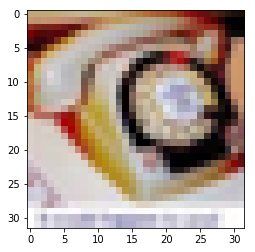

In [0]:
img = x[0].reshape(3,32,32).transpose([1, 2, 0])
plt.imshow(img, interpolation='nearest');

In [0]:
y_class=[[0] if i in [22,39,40,86,87] else [1] for i in y]
y_class_name=["Electronics" if i in [22,39,40,86,87] else "Furniture" for i in y]

In [0]:
y_class_1 = pd.DataFrame(y_class, columns=list('x'))
y_class_1['x'].value_counts()

1    3000
0    3000
Name: x, dtype: int64

In [0]:
def cifar_grid(X,Y,inds,n_col):#print out randomly selected images and their labels
  N = len(inds)
  n_row = int(ceil(1.0*N/n_col))
  fig = plt.figure(figsize=(10, 10))
  
# align labels in the right order, i.e., from 0 to 9
  clabels = {22:'clock', 39:'computer keyboard', 40:'lamp', 86:'telephone', 87:'television',5: 'bed',20: 'chair', 25:'couch', 84:'table', 94:'wardrobe'}
  print(type(clabels))
  for j in range(n_row):
    for k in range(n_col):
      i_inds = (j*n_col)+k
      i_data = inds[i_inds]
      
      if i_inds < N:
        rgb = X[[i_data,...]]
        label =clabels[Y[i_data][0]]
        img = rgb.reshape(3,32,32).transpose([1, 2, 0])
        fig.add_subplot(n_row,n_col, i_inds+1)
        plt.imshow(img, interpolation='nearest')
        plt.title("{}, {}".format(y_class_name[i_data],label))
        
         
  fig.set_tight_layout(True)

[146, 3180, 2070, 1970, 2198, 3716, 3366, 1089, 2707, 3835, 3569, 4087, 2164, 1805, 2611, 3627]
<class 'dict'>


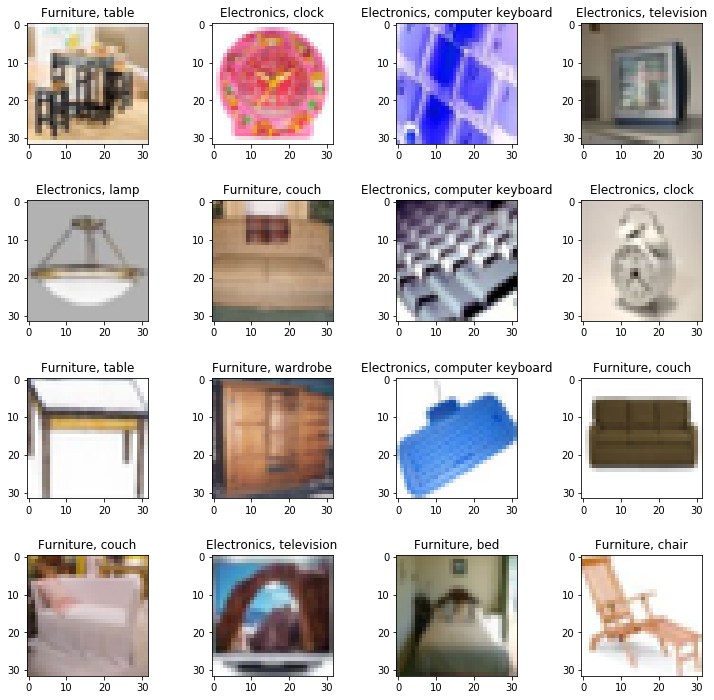

In [0]:
indices = [np.random.choice(range(len(x))) for i in range(16)]
print (indices)

cifar_grid(x,y,indices,4)

In [0]:
y.shape

(6000, 1)

In [0]:
np.unique(y)

array([ 5, 20, 22, 25, 39, 40, 84, 86, 87, 94])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=1, stratify=y)
print(X_train.shape)
print(y_train.shape)

(4800, 3, 32, 32)
(4800, 1)


In [0]:
y_train_class=[[0] if i in [22,39,40,86,87] else [1] for i in y_train]
y_test_class=[[0] if i in [22,39,40,86,87] else [1] for i in y_test]

In [0]:
y_test_class_1 = pd.DataFrame(y_test_class, columns=list('x'))
y_test_class_1['x'].value_counts()

1    600
0    600
Name: x, dtype: int64

In [0]:
print(X_test.shape)
print(y_test.shape)

(1200, 3, 32, 32)
(1200, 1)


In [0]:
# Convert class vectors to binary class matrices.
y_train_c = to_categorical(y_train_class, 2)
y_test_c = to_categorical(y_test_class, 2)
#Normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [0]:
y_test_c.shape[1]

2

In [0]:
y_train_c

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [0]:
y_train_c.shape

(4800, 2)

In [0]:
X_train.shape

(4800, 3, 32, 32)

In [0]:
y_train.shape

(4800, 1)

In [0]:
X_train_1 = X_train.reshape(X_train.shape[0],3*32*32)
X_test_1 = X_test.reshape(X_test.shape[0],3*32*32)

**Random Forest**

In [0]:
#Let's see how good is RandomForest 
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
logit = RandomForestClassifier(random_state=25)
X_train_1 = X_train.reshape(X_train.shape[0],3*32*32)
X_test_1 = X_test.reshape(X_test.shape[0],3*32*32)
logit.fit(X_train_1, y_train_class)
print ("RandomForest Accuracy: {}%".format(logit.score(X_test_1, y_test_class)*100))

NameError: ignored

In [0]:
#Let's see how good is RandomForest 
from sklearn.neighbors import KNeighborsClassifier

logit = KNeighborsClassifier()
X_train_1 = X_train.reshape(X_train.shape[0],3*32*32)
X_test_1 = X_test.reshape(X_test.shape[0],3*32*32)
t1 = datetime.now()
logit.fit(X_train_1, y_train_class)
print("time taken =", datetime.now()-t1)
print (" KNeighborsClassifier Accuracy: {}%".format(logit.score(X_test_1, y_test_class)*100))

time taken = 0:00:01.411477
 KNeighborsClassifier Accuracy: 69.83333333333334%


In [0]:
#Let's review how MLPClassifier got trained and do prediction
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(1000), activation='relu')
t1 = datetime.now()
mlp.fit(X_train_1, y_train_class)
print("time taken =", datetime.now()-t1)
score =mlp.score(X_test_1, y_test_class)
print('MLP NN score: %.2f%%' %(score*100))

NameError: ignored

## SVM  with GridSearchCV

In [0]:
from datetime import datetime
from sklearn import svm

In [0]:

from sklearn.model_selection import GridSearchCV
t1 = datetime.now()
param_grid = [
 {'C': [1, 10], 'kernel': ['linear']},
 {'C': [1, 10], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
 {'C': [1, 10],'degree':[2,3], 'kernel': ['poly']}
]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train_1, y_train_class)
print("time taken =", datetime.now()-t1)

time taken = 1:00:55.444201


In [0]:
clf.score(X_test_1, y_test_class)

0.7958333333333333

In [0]:
# Train a new classifier using the best parameters found by the grid search
t1 = datetime.now()
model1 = svm.SVC(C=1, kernel='rbf', gamma=0.01)
model1.fit(X_train_1, y_train_class)
print("time taken =", datetime.now()-t1)
score = model1.score(X_test_1, y_test_class)
print(score)

time taken = 0:01:19.767309
0.77


In [0]:
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)
# print('Best Degree:',clf.best_estimator_.degree)

Best C: 1
Best Kernel: rbf
Best Gamma: 0.01


In [0]:
y_pred = clf.predict(X_test_1)

In [0]:
y_test[:5]

array([[84],
       [84],
       [94],
       [40],
       [87]])

In [0]:
from sklearn.metrics import confusion_matrix
import pandas as pd

confusion_df = pd.DataFrame(confusion_matrix(y_test_class,y_pred),
             columns=["Predicted Class " + str(class_name) for class_name in ['Electronics','Furniture']],
             index = ["Class " + str(class_name) for class_name in ['Electronics','Furniture']])

print(confusion_df)

                   Predicted Class Electronics  Predicted Class Furniture
Class Electronics                          481                        121
Class Furniture                            124                        474


## Simple neural network

In [0]:
model_nn = Sequential()

#inputing layers
model_nn.add(Dense(1000, activation="relu",input_shape=(3072,)))  # The input_shape is 1024 so that each pixel from the image is represented (32x32x3)
# model_nn.add(Dense(1000, activation="relu"))
model_nn.add(Dense(2, activation='softmax'))

In [0]:
model_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 2002      
Total params: 3,075,002
Trainable params: 3,075,002
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compiling the model, using the adam optimizer
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
early_stop=EarlyStopping(patience=2)

hist= model_nn.fit(X_train_1, y_train_c,validation_split=0.3, epochs=20, callbacks=[early_stop])

Train on 3360 samples, validate on 1440 samples
Epoch 1/20
3360/3360 [==============================] - 6s 2ms/step - loss: 6.3526 - acc: 0.5354 - val_loss: 3.6201 - val_acc: 0.5549
Epoch 2/20
3360/3360 [==============================] - 6s 2ms/step - loss: 1.4818 - acc: 0.6310 - val_loss: 0.7774 - val_acc: 0.6674
Epoch 3/20
3360/3360 [==============================] - 6s 2ms/step - loss: 0.7632 - acc: 0.6437 - val_loss: 0.7702 - val_acc: 0.6347
Epoch 4/20
3360/3360 [==============================] - 6s 2ms/step - loss: 0.8157 - acc: 0.6533 - val_loss: 0.7595 - val_acc: 0.6354
Epoch 5/20
3360/3360 [==============================] - 6s 2ms/step - loss: 0.7239 - acc: 0.6661 - val_loss: 0.6404 - val_acc: 0.6757
Epoch 6/20
3360/3360 [==============================] - 6s 2ms/step - loss: 0.6739 - acc: 0.6696 - val_loss: 0.6174 - val_acc: 0.6924
Epoch 7/20
3360/3360 [==============================] - 6s 2ms/step - loss: 0.6376 - acc: 0.6973 - val_loss: 0.8290 - val_acc: 0.6083
Epoch 8/20
336

In [0]:
scores = model_nn.evaluate(X_test_1, y_test_c, verbose=0)
print("NN score: %.2f%%" % (scores[1]*100))

NN score: 69.50%


## CNN 

In [0]:
model_cnn1 = Sequential()

model_cnn1.add(Conv2D(32, 3, 3, border_mode='same', input_shape=X_train.shape[1:], activation='relu', ))

model_cnn1.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))



model_cnn1.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))

model_cnn1.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn1.add(Dropout(0.5))



#model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))

#model.add(MaxPooling2D(pool_size=(2, 2)))


model_cnn1.add(Flatten())
model_cnn1.add(Dense(256, activation='relu'))
model_cnn1.add(Dropout(0.5))



model_cnn1.add(Dense(2, activation='softmax'))

opt = Adam(lr=0.0004, decay=1e-6)
   
model_cnn1.compile(loss='categorical_crossentropy',
           optimizer=opt,
           metrics=['accuracy'])

In [0]:
print('Using real-time data augmentation.')
datagen = ImageDataGenerator(
featurewise_center=False, 
samplewise_center=False,  
featurewise_std_normalization=False,
samplewise_std_normalization=False, 
zca_whitening=False, 
rotation_range=0, 
width_shift_range=0, 
height_shift_range=0,
horizontal_flip=True, 
vertical_flip=False) 

datagen.fit(X_train)

Using real-time data augmentation.


In [0]:
epochs = 10
batch_size=32
early_stop=EarlyStopping(patience=2)
hist = model_cnn1.fit_generator(datagen.flow(X_train, y_train_c,batch_size=batch_size,shuffle=True),
  steps_per_epoch=x_train.shape[0] // batch_size,
  epochs=epochs,
  validation_data=(X_test, y_test_c),
  workers=4, 
  callbacks=[early_stop])

Epoch 1/10
1562/1562 [==============================] - 227s 145ms/step - loss: 0.4480 - acc: 0.7867 - val_loss: 0.4170 - val_acc: 0.8033
Epoch 2/10
1562/1562 [==============================] - 228s 146ms/step - loss: 0.2933 - acc: 0.8728 - val_loss: 0.4022 - val_acc: 0.8250
Epoch 3/10
1562/1562 [==============================] - 224s 144ms/step - loss: 0.2069 - acc: 0.9138 - val_loss: 0.4034 - val_acc: 0.8325
Epoch 4/10
1562/1562 [==============================] - 218s 140ms/step - loss: 0.1426 - acc: 0.9444 - val_loss: 0.4445 - val_acc: 0.8333


In [0]:
scores = model_cnn1.evaluate(X_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 83.33%


In [0]:
def plot_model_history(model_history):
   fig, axs = plt.subplots(1,2,figsize=(15,5))
   # summarize history for accuracy
   axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
   axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
   axs[0].set_title('Model Accuracy')
   axs[0].set_ylabel('Accuracy')
   axs[0].set_xlabel('Epoch')
   axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
   axs[0].legend(['train', 'test'], loc='best')
   # summarize history for loss
   axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
   axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
   axs[1].set_title('Model Loss')
   axs[1].set_ylabel('Loss')
   axs[1].set_xlabel('Epoch')
   axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
   axs[1].legend(['train', 'test'], loc='best')
   plt.show()
  

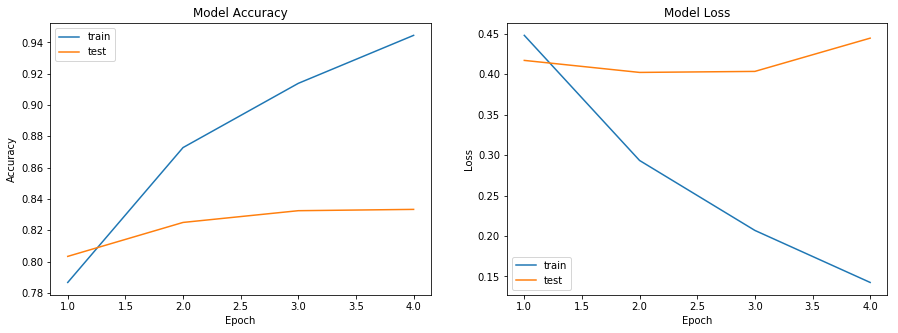

In [0]:
plot_model_history(hist)

## CNN 2

In [0]:
model_cnn2 = Sequential()

model_cnn2.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model_cnn2.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn2.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model_cnn2.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_cnn2.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn2.add(Flatten())
model_cnn2.add(Dense(64, activation='relu'))
model_cnn2.add(Dropout(0.5))
model_cnn2.add(Dense(2, activation='sigmoid'))


opt = Adam(lr=0.0001, decay=1e-6)

model_cnn2.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [0]:
print('Using real-time data augmentation.')

datagen = ImageDataGenerator(
featurewise_center=False, 
samplewise_center=False,  
featurewise_std_normalization=False,
samplewise_std_normalization=False, 
zca_whitening=False, 
rotation_range=0, 
width_shift_range=0.1, 
height_shift_range=0.1,
horizontal_flip=True, 
vertical_flip=False) 

datagen.fit(X_train)

Using real-time data augmentation.


In [0]:
batch_size = 256 
num_classes = 10


In [0]:
#Let's train the model
batch_size = 256 
epochs = 10
hist_2 = model_cnn2.fit_generator(datagen.flow(X_train, y_train_c,batch_size=batch_size,shuffle=True),
   steps_per_epoch=x_train.shape[0] // batch_size,
   epochs=epochs,
   validation_data=(X_test, y_test_c),
   workers=4)


Epoch 1/10
195/195 [==============================] - 61s 313ms/step - loss: 0.6666 - acc: 0.6044 - val_loss: 0.6040 - val_acc: 0.7042
Epoch 2/10
195/195 [==============================] - 60s 306ms/step - loss: 0.6097 - acc: 0.6852 - val_loss: 0.5796 - val_acc: 0.7175
Epoch 3/10
195/195 [==============================] - 60s 305ms/step - loss: 0.5952 - acc: 0.6971 - val_loss: 0.5707 - val_acc: 0.7317
Epoch 4/10
195/195 [==============================] - 60s 307ms/step - loss: 0.5805 - acc: 0.7075 - val_loss: 0.5564 - val_acc: 0.7317
Epoch 5/10
195/195 [==============================] - 59s 305ms/step - loss: 0.5646 - acc: 0.7197 - val_loss: 0.5422 - val_acc: 0.7533
Epoch 6/10
195/195 [==============================] - 59s 304ms/step - loss: 0.5514 - acc: 0.7279 - val_loss: 0.5360 - val_acc: 0.7492
Epoch 7/10
195/195 [==============================] - 60s 310ms/step - loss: 0.5384 - acc: 0.7356 - val_loss: 0.5187 - val_acc: 0.7592
Epoch 8/10
195/195 [==============================] - 6

In [0]:
#Let's train the model
batch_size = 256 
epochs = 10
hist_2 = model_cnn2.fit_generator(datagen.flow(X_train, y_train_c,batch_size=batch_size,shuffle=True),
   steps_per_epoch=x_train.shape[0] // batch_size,
   epochs=epochs,
   validation_data=(X_test, y_test_c),
   workers=4)

Epoch 1/10
195/195 [==============================] - 61s 312ms/step - loss: 0.5041 - acc: 0.7577 - val_loss: 0.5046 - val_acc: 0.7600
Epoch 2/10
195/195 [==============================] - 59s 304ms/step - loss: 0.4986 - acc: 0.7620 - val_loss: 0.5076 - val_acc: 0.7558
Epoch 3/10
195/195 [==============================] - 59s 304ms/step - loss: 0.4902 - acc: 0.7656 - val_loss: 0.4949 - val_acc: 0.7600
Epoch 4/10
195/195 [==============================] - 59s 303ms/step - loss: 0.4865 - acc: 0.7667 - val_loss: 0.5011 - val_acc: 0.7533
Epoch 5/10
195/195 [==============================] - 59s 304ms/step - loss: 0.4807 - acc: 0.7689 - val_loss: 0.4839 - val_acc: 0.7725
Epoch 6/10
195/195 [==============================] - 60s 305ms/step - loss: 0.4791 - acc: 0.7727 - val_loss: 0.4802 - val_acc: 0.7808
Epoch 7/10
195/195 [==============================] - 59s 305ms/step - loss: 0.4746 - acc: 0.7739 - val_loss: 0.4782 - val_acc: 0.7758
Epoch 8/10
195/195 [==============================] - 5

In [0]:
scores = model_cnn2.evaluate(X_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 76.58%


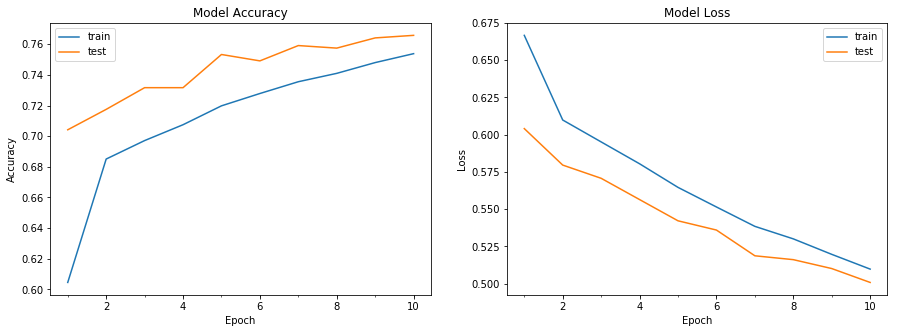

In [0]:
plot_model_history(hist_2)

In [0]:
scores = model_cnn2.evaluate(X_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 50.17%


## CNN3

In [0]:
model_cnn3 = Sequential()

model_cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
# model.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
model_cnn3.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(1))

model_cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_cnn3.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model_cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn3.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn3.add(Flatten())
model_cnn3.add(Dense(64, activation='relu'))
model_cnn3.add(Dropout(0.5))
model_cnn3.add(Dense(2, activation='sigmoid'))


opt = Adam(lr=0.0001, decay=1e-6)

model_cnn3.compile(loss='categorical_crossentropy',
             optimizer= opt,
             metrics=['accuracy'])

In [0]:
print('Using real-time data augmentation.')

datagen = ImageDataGenerator(
featurewise_center=False, 
samplewise_center=False,  
featurewise_std_normalization=False,
samplewise_std_normalization=False, 
zca_whitening=False, 
rotation_range=0, 
width_shift_range=0.1, 
height_shift_range=0.1,
horizontal_flip=True, 
vertical_flip=False) 

datagen.fit(X_train)

Using real-time data augmentation.


In [0]:
#Let's train the model
batch_size = 256 
epochs = 10
early_stop =EarlyStopping(patience=2)

hist_3 = model_cnn3.fit_generator(datagen.flow(X_train, y_train_c,batch_size=batch_size,shuffle=True),
   steps_per_epoch=x_train.shape[0] // batch_size,
   epochs=epochs,
   validation_data=(X_test, y_test_c),
   workers=4,
   callbacks=[early_stop])

Epoch 1/10
195/195 [==============================] - 93s 479ms/step - loss: 0.6398 - acc: 0.6514 - val_loss: 0.5746 - val_acc: 0.7217
Epoch 2/10
195/195 [==============================] - 93s 476ms/step - loss: 0.5885 - acc: 0.7027 - val_loss: 0.5569 - val_acc: 0.7300
Epoch 3/10
195/195 [==============================] - 93s 476ms/step - loss: 0.5700 - acc: 0.7175 - val_loss: 0.5488 - val_acc: 0.7250
Epoch 4/10
195/195 [==============================] - 93s 476ms/step - loss: 0.5513 - acc: 0.7291 - val_loss: 0.5335 - val_acc: 0.7350
Epoch 5/10
195/195 [==============================] - 93s 474ms/step - loss: 0.5325 - acc: 0.7438 - val_loss: 0.5114 - val_acc: 0.7600
Epoch 6/10
195/195 [==============================] - 92s 474ms/step - loss: 0.5167 - acc: 0.7519 - val_loss: 0.5114 - val_acc: 0.7542
Epoch 7/10
195/195 [==============================] - 92s 474ms/step - loss: 0.5018 - acc: 0.7614 - val_loss: 0.5010 - val_acc: 0.7583
Epoch 8/10
195/195 [==============================] - 9

In [0]:
scores = model_cnn3.evaluate(X_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 77.92%


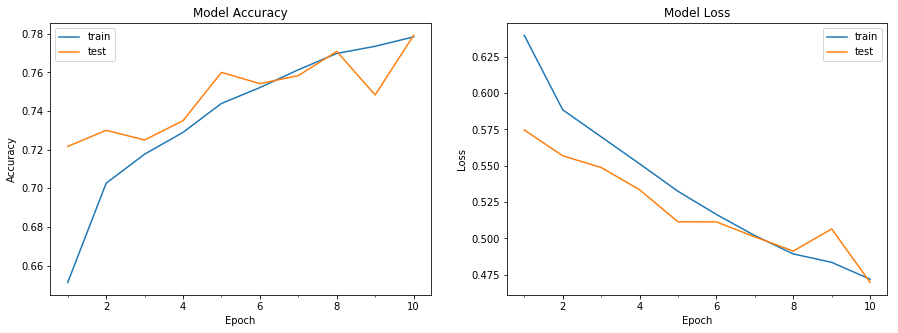

In [0]:
plot_model_history(hist_3)

## CNN 4

In [0]:
model_cnn4 = Sequential()

model_cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model_cnn4.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn4.add(Dropout(1))

model_cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_cnn4.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn4.add(Dropout(0.25))

model_cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn4.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn4.add(Dropout(0.25))

model_cnn4.add(Flatten())
model_cnn4.add(Dense(128, activation='relu'))
model_cnn4.add(Dropout(0.5))
model_cnn4.add(Dense(2, activation='sigmoid'))


opt = Adam(lr=0.0001, decay=1e-6, )

model_cnn4.compile(loss='categorical_crossentropy',
             optimizer= opt,
             metrics=['accuracy'])

In [0]:
print('Using real-time data augmentation.')

datagen = ImageDataGenerator(
featurewise_center=False, 
samplewise_center=False,  
featurewise_std_normalization=False,
samplewise_std_normalization=False, 
zca_whitening=False, 
rotation_range=0, 
width_shift_range=0.1, 
height_shift_range=0.1,
horizontal_flip=True, 
vertical_flip=False) 

datagen.fit(X_train)

Using real-time data augmentation.


In [0]:
#Let's train the model
batch_size = 32 
epochs = 10
hist_4 = model_cnn4.fit_generator(datagen.flow(X_train, y_train_c,batch_size=batch_size,shuffle=True),
   steps_per_epoch=200,
   epochs=epochs,
   validation_data=(X_test, y_test_c),
   workers=4)

Epoch 1/10
200/200 [==============================] - 18s 89ms/step - loss: 0.6854 - acc: 0.5458 - val_loss: 0.6561 - val_acc: 0.6425
Epoch 2/10
200/200 [==============================] - 15s 75ms/step - loss: 0.6316 - acc: 0.6641 - val_loss: 0.5988 - val_acc: 0.7167
Epoch 3/10
200/200 [==============================] - 15s 75ms/step - loss: 0.6117 - acc: 0.6823 - val_loss: 0.5899 - val_acc: 0.7075
Epoch 4/10
200/200 [==============================] - 15s 75ms/step - loss: 0.6016 - acc: 0.6872 - val_loss: 0.5944 - val_acc: 0.6992
Epoch 5/10
200/200 [==============================] - 15s 75ms/step - loss: 0.6039 - acc: 0.6837 - val_loss: 0.5813 - val_acc: 0.7133
Epoch 6/10
200/200 [==============================] - 15s 76ms/step - loss: 0.5878 - acc: 0.7044 - val_loss: 0.5810 - val_acc: 0.7033
Epoch 7/10
200/200 [==============================] - 15s 75ms/step - loss: 0.5849 - acc: 0.7005 - val_loss: 0.5708 - val_acc: 0.7167
Epoch 8/10
200/200 [==============================] - 15s 75ms

In [0]:
scores = model_cnn4.evaluate(X_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 72.42%


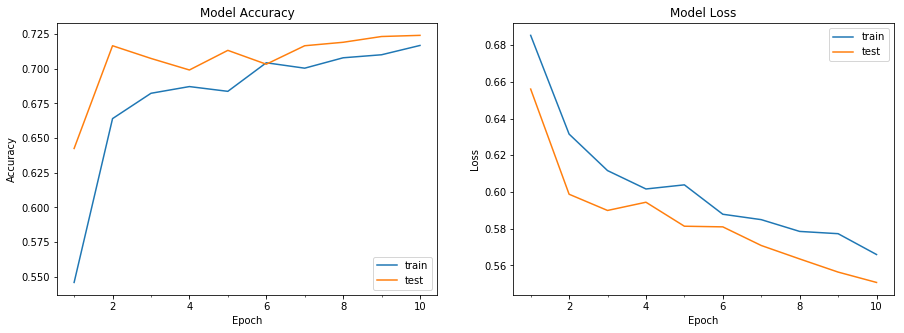

In [0]:
plot_model_history(hist_4)

# CNN 5

In [0]:
model_cnn5 = Sequential()

model_cnn5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model_cnn5.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn5.add(Dropout(0.25))

model_cnn5.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_cnn5.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn5.add(Dropout(0.25))

model_cnn5.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn5.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn5.add(Dropout(0.25))

model_cnn5.add(Flatten())
model_cnn5.add(Dense(128, activation='relu'))
model_cnn5.add(Dropout(0.5))
model_cnn5.add(Dense(2, activation='softmax'))


opt = Adam(lr=0.0001, decay=1e-3)

model_cnn5.compile(loss='categorical_crossentropy',
             optimizer= opt,
             metrics=['accuracy'])

In [0]:
print('Using real-time data augmentation.')

datagen = ImageDataGenerator(
featurewise_center=False, 
samplewise_center=False,  
featurewise_std_normalization=False,
samplewise_std_normalization=False, 
zca_whitening=False, 
rotation_range=0, 
width_shift_range=0.1, 
height_shift_range=0.1,
horizontal_flip=True, 
vertical_flip=False) 

datagen.fit(X_train)

Using real-time data augmentation.


In [0]:
#Let's train the model
batch_size = 32 
epochs = 10
early_stop =EarlyStopping(patience=2)

hist_4 = model_cnn5.fit_generator(datagen.flow(X_train, y_train_c,batch_size=batch_size,shuffle=True),
   steps_per_epoch=X_train.shape[0] // batch_size,
   epochs=epochs,
   validation_data=(X_test, y_test_c),
   workers=4,
   callbacks=[early_stop])

Epoch 1/10
150/150 [==============================] - 12s 83ms/step - loss: 0.6670 - acc: 0.6056 - val_loss: 0.6470 - val_acc: 0.6725
Epoch 2/10
150/150 [==============================] - 12s 81ms/step - loss: 0.6221 - acc: 0.6700 - val_loss: 0.6023 - val_acc: 0.7142
Epoch 3/10
150/150 [==============================] - 12s 83ms/step - loss: 0.6124 - acc: 0.6821 - val_loss: 0.6039 - val_acc: 0.7075
Epoch 4/10
150/150 [==============================] - 12s 81ms/step - loss: 0.6089 - acc: 0.6827 - val_loss: 0.5978 - val_acc: 0.7192
Epoch 5/10
150/150 [==============================] - 12s 83ms/step - loss: 0.6086 - acc: 0.6875 - val_loss: 0.5971 - val_acc: 0.7183
Epoch 6/10
150/150 [==============================] - 12s 83ms/step - loss: 0.6016 - acc: 0.6923 - val_loss: 0.5948 - val_acc: 0.7183
Epoch 7/10
150/150 [==============================] - 13s 84ms/step - loss: 0.6017 - acc: 0.6915 - val_loss: 0.5932 - val_acc: 0.7175
Epoch 8/10
150/150 [==============================] - 13s 83ms

In [0]:
scores = model_cnn5.evaluate(X_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 71.17%


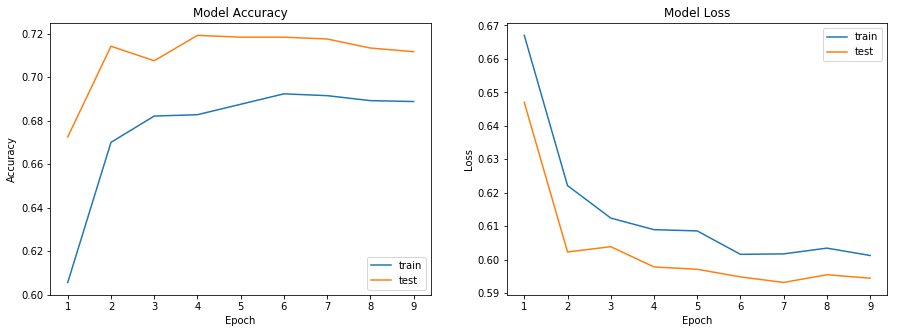

In [0]:
plot_model_history(hist_4)

## CNN6

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
# model.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(1))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


opt = Adam(lr=0.0004)

model.compile(loss='categorical_crossentropy',
            optimizer= opt,
            metrics=['accuracy'])

In [0]:
print('Using real-time data augmentation.')

datagen = ImageDataGenerator(
featurewise_center=False, 
samplewise_center=False,  
featurewise_std_normalization=False,
samplewise_std_normalization=False, 
zca_whitening=False, 
rotation_range=0, 
width_shift_range=0.1, 
height_shift_range=0.1,
horizontal_flip=True, 
vertical_flip=False) 

datagen.fit(X_train)

Using real-time data augmentation.


In [0]:
#Let's train the model
batch_size = 32 
epochs = 10
early_stop =EarlyStopping(patience=2)

hist_5 = model.fit_generator(datagen.flow(X_train, y_train_c,batch_size=batch_size,shuffle=True),
   steps_per_epoch=x_train.shape[0] // batch_size,
   epochs=epochs,
   validation_data=(X_test, y_test_c),
   workers=4)

Epoch 1/10
1562/1562 [==============================] - 108s 69ms/step - loss: 0.5554 - acc: 0.7134 - val_loss: 0.4889 - val_acc: 0.7675
Epoch 2/10
1562/1562 [==============================] - 105s 67ms/step - loss: 0.4490 - acc: 0.7889 - val_loss: 0.4279 - val_acc: 0.8133
Epoch 3/10
1562/1562 [==============================] - 100s 64ms/step - loss: 0.4009 - acc: 0.8160 - val_loss: 0.4012 - val_acc: 0.8217
Epoch 4/10
1562/1562 [==============================] - 103s 66ms/step - loss: 0.3687 - acc: 0.8325 - val_loss: 0.4003 - val_acc: 0.8258
Epoch 5/10
1562/1562 [==============================] - 104s 66ms/step - loss: 0.3452 - acc: 0.8454 - val_loss: 0.3862 - val_acc: 0.8383
Epoch 6/10
1562/1562 [==============================] - 105s 67ms/step - loss: 0.3260 - acc: 0.8570 - val_loss: 0.3721 - val_acc: 0.8408
Epoch 7/10
1562/1562 [==============================] - 105s 67ms/step - loss: 0.3075 - acc: 0.8645 - val_loss: 0.3842 - val_acc: 0.8433
Epoch 8/10
1562/1562 [===================

In [0]:
scores = model.evaluate(X_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 84.58%


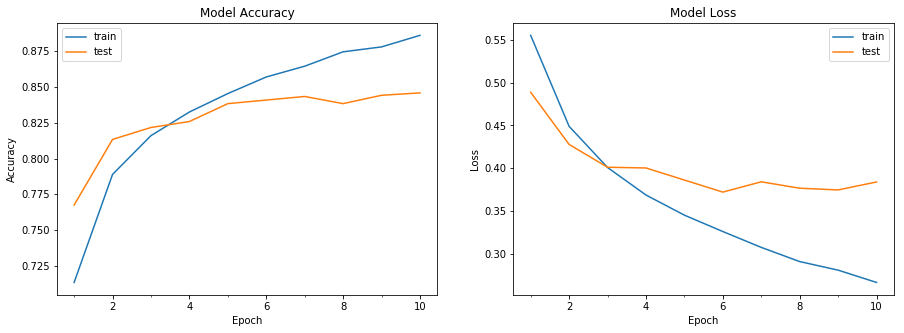

In [0]:
plot_model_history(hist_5)

## CNN-6

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
# model.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


opt = Adam(lr=0.0004)

model.compile(loss='categorical_crossentropy',
            optimizer= opt,
            metrics=['accuracy'])

In [0]:
print('Using real-time data augmentation.')

datagen = ImageDataGenerator(
featurewise_center=False, 
samplewise_center=False,  
featurewise_std_normalization=False,
samplewise_std_normalization=False, 
zca_whitening=False, 
rotation_range=0, 
width_shift_range=0.1, 
height_shift_range=0.1,
horizontal_flip=True, 
vertical_flip=False) 

datagen.fit(X_train)

Using real-time data augmentation.


In [0]:
#Let's train the model
batch_size = 32 
epochs = 10
early_stop =EarlyStopping(patience=2)

hist_6 = model.fit_generator(datagen.flow(X_train, y_train_c,batch_size=batch_size,shuffle=True),
   steps_per_epoch=x_train.shape[0] // batch_size,
   epochs=epochs,
   validation_data=(X_test, y_test_c),
   workers=4)

Epoch 1/10
1562/1562 [==============================] - 115s 74ms/step - loss: 0.5887 - acc: 0.6939 - val_loss: 0.5188 - val_acc: 0.7475
Epoch 2/10
1562/1562 [==============================] - 112s 71ms/step - loss: 0.5204 - acc: 0.7429 - val_loss: 0.4769 - val_acc: 0.7642
Epoch 3/10
1562/1562 [==============================] - 111s 71ms/step - loss: 0.4875 - acc: 0.7640 - val_loss: 0.4802 - val_acc: 0.7683
Epoch 4/10
1562/1562 [==============================] - 112s 71ms/step - loss: 0.4639 - acc: 0.7764 - val_loss: 0.4476 - val_acc: 0.8058
Epoch 5/10
1562/1562 [==============================] - 112s 72ms/step - loss: 0.4467 - acc: 0.7870 - val_loss: 0.4187 - val_acc: 0.8142
Epoch 6/10
1562/1562 [==============================] - 113s 73ms/step - loss: 0.4307 - acc: 0.7995 - val_loss: 0.4223 - val_acc: 0.8150
Epoch 7/10
1562/1562 [==============================] - 113s 73ms/step - loss: 0.4198 - acc: 0.8030 - val_loss: 0.4392 - val_acc: 0.7850
Epoch 8/10
1562/1562 [===================

In [0]:
scores = model.evaluate(X_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 83.50%


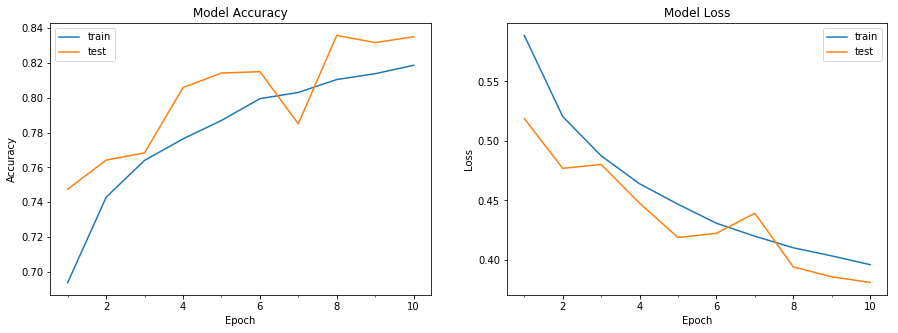

In [0]:
plot_model_history(hist_6)

# CNN7

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),padding="same",activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(2, 2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))


opt = Adam(lr=0.0004, decay=1e-6)

model.compile(loss='categorical_crossentropy',
           optimizer=opt,
           metrics=['accuracy'])


In [0]:
print('Using real-time data augmentation.')

datagen = ImageDataGenerator(
featurewise_center=False, 
samplewise_center=False,  
featurewise_std_normalization=False,
samplewise_std_normalization=False, 
zca_whitening=False, 
rotation_range=0, 
width_shift_range=0.1, 
height_shift_range=0.1,
horizontal_flip=True, 
vertical_flip=False) 

datagen.fit(X_train)

Using real-time data augmentation.


In [0]:
#Let's train the model
batch_size = 32 
epochs = 10
early_stop =EarlyStopping(patience=2)

hist_7 = model.fit_generator(datagen.flow(X_train, y_train_c,batch_size=batch_size,shuffle=True),
   steps_per_epoch=x_train.shape[0] // batch_size,
   epochs=epochs,
   validation_data=(X_test, y_test_c),
   workers=4)

Epoch 1/10
1562/1562 [==============================] - 146s 93ms/step - loss: 0.5348 - acc: 0.7327 - val_loss: 0.4737 - val_acc: 0.7683
Epoch 2/10
1562/1562 [==============================] - 138s 89ms/step - loss: 0.4394 - acc: 0.7931 - val_loss: 0.4301 - val_acc: 0.8042
Epoch 3/10
1562/1562 [==============================] - 140s 89ms/step - loss: 0.3902 - acc: 0.8206 - val_loss: 0.4001 - val_acc: 0.8367
Epoch 4/10
1562/1562 [==============================] - 138s 89ms/step - loss: 0.3557 - acc: 0.8385 - val_loss: 0.3761 - val_acc: 0.8342
Epoch 5/10
1562/1562 [==============================] - 140s 89ms/step - loss: 0.3349 - acc: 0.8500 - val_loss: 0.3538 - val_acc: 0.8492
Epoch 6/10
1562/1562 [==============================] - 141s 90ms/step - loss: 0.3135 - acc: 0.8616 - val_loss: 0.3713 - val_acc: 0.8358
Epoch 7/10
1562/1562 [==============================] - 140s 90ms/step - loss: 0.2924 - acc: 0.8736 - val_loss: 0.3840 - val_acc: 0.8208
Epoch 8/10
1562/1562 [===================

In [0]:
scores = model.evaluate(X_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 84.83%


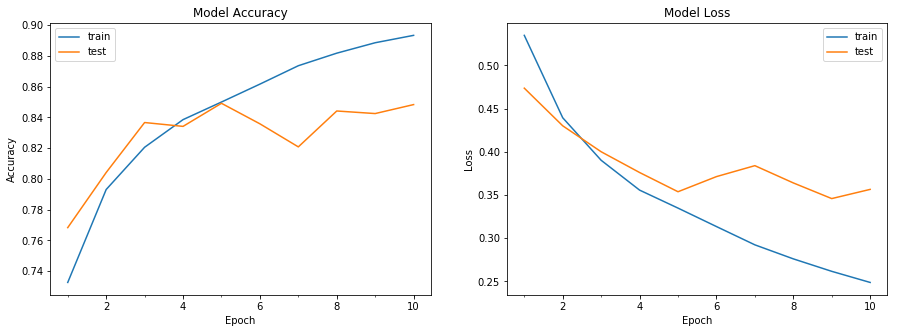

In [0]:
plot_model_history(hist_7)

# CNN 8

In [0]:
model_cnn9 = Sequential()

model_cnn9.add(Conv2D(32, kernel_size=(3, 3),padding="same",activation='relu', input_shape=X_train.shape[1:]))
model_cnn9.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn9.add(Conv2D(64, kernel_size=(2, 2),activation='relu'))
model_cnn9.add(MaxPooling2D(pool_size=(2, 2)))
#model_cnn9.add(Dropout(0.5))


model_cnn9.add(Flatten())
model_cnn9.add(Dense(256, activation='relu'))
model_cnn9.add(Dropout(0.5))

model_cnn9.add(Dense(2, activation='softmax'))


opt = Adam(lr=0.0004, decay=1e-6)

model_cnn9.compile(loss='categorical_crossentropy',
           optimizer=opt,
           metrics=['accuracy'])


In [0]:
print('Using real-time data augmentation.')

datagen = ImageDataGenerator(
featurewise_center=False, 
samplewise_center=False,  
featurewise_std_normalization=False,
samplewise_std_normalization=False, 
zca_whitening=False, 
rotation_range=0, 
width_shift_range=0.1, 
height_shift_range=0.1,
horizontal_flip=True, 
vertical_flip=False) 

datagen.fit(X_train)

Using real-time data augmentation.


In [0]:
#Let's train the model
batch_size = 32 
epochs = 10
early_stop =EarlyStopping(patience=2)

hist_9 = model_cnn9.fit_generator(datagen.flow(X_train, y_train_c,batch_size=batch_size,shuffle=True),
   steps_per_epoch=x_train.shape[0] // batch_size,
   epochs=epochs,
   validation_data=(X_test, y_test_c),
   workers=4)

Epoch 1/10
1562/1562 [==============================] - 148s 95ms/step - loss: 0.5030 - acc: 0.7503 - val_loss: 0.4427 - val_acc: 0.7833
Epoch 2/10
1562/1562 [==============================] - 131s 84ms/step - loss: 0.4016 - acc: 0.8133 - val_loss: 0.4064 - val_acc: 0.8200
Epoch 3/10
1562/1562 [==============================] - 140s 90ms/step - loss: 0.3453 - acc: 0.8455 - val_loss: 0.3758 - val_acc: 0.8325
Epoch 4/10
1562/1562 [==============================] - 137s 88ms/step - loss: 0.3079 - acc: 0.8647 - val_loss: 0.4126 - val_acc: 0.8267
Epoch 5/10
1562/1562 [==============================] - 140s 90ms/step - loss: 0.2776 - acc: 0.8801 - val_loss: 0.3735 - val_acc: 0.8533
Epoch 6/10
1562/1562 [==============================] - 149s 95ms/step - loss: 0.2517 - acc: 0.8923 - val_loss: 0.3600 - val_acc: 0.8425
Epoch 7/10
1562/1562 [==============================] - 144s 92ms/step - loss: 0.2299 - acc: 0.9027 - val_loss: 0.3505 - val_acc: 0.8600
Epoch 8/10
1562/1562 [===================

In [0]:
scores = model_cnn9.evaluate(X_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 85.00%


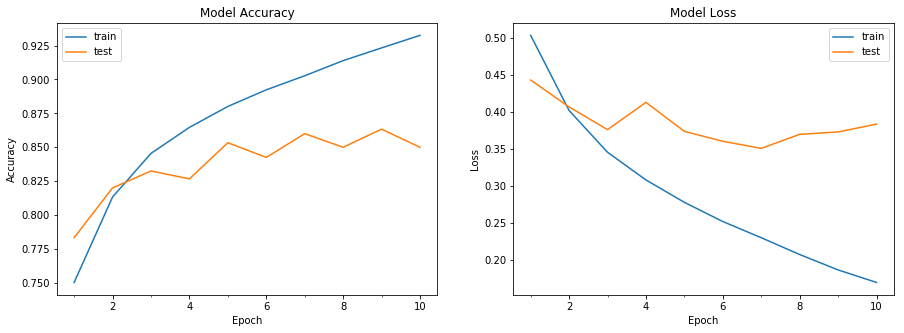

In [0]:
plot_model_history(hist_9)

## CNN 10

In [0]:
model_cnn10 = Sequential()

model_cnn10.add(Conv2D(32, kernel_size=(3, 3),padding="same",activation='relu', input_shape=X_train.shape[1:]))
model_cnn10.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn10.add(Dropout(0.5))

model_cnn10.add(Conv2D(64, kernel_size=(2, 2),activation='relu'))
model_cnn10.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn10.add(Dropout(0.5))


model_cnn10.add(Flatten())
model_cnn10.add(Dense(256, activation='relu'))
model_cnn10.add(Dropout(0.5))

model_cnn10.add(Dense(2, activation='softmax'))


opt = Adam(lr=0.0004, decay=1e-6)

model_cnn10.compile(loss='categorical_crossentropy',
           optimizer=opt,
           metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
print('Using real-time data augmentation.')

datagen = ImageDataGenerator(
featurewise_center=False, 
samplewise_center=False,  
featurewise_std_normalization=False,
samplewise_std_normalization=False, 
zca_whitening=False, 
rotation_range=0, 
width_shift_range=0.1, 
height_shift_range=0.1,
horizontal_flip=True, 
vertical_flip=False) 

datagen.fit(X_train)

Using real-time data augmentation.


In [0]:
#Let's train the model
batch_size = 32 
epochs = 10
early_stop =EarlyStopping(patience=2)

hist_10 = model_cnn10.fit_generator(datagen.flow(X_train, y_train_c,batch_size=batch_size,shuffle=True),
   steps_per_epoch=x_train.shape[0] // batch_size,
   epochs=epochs,
   validation_data=(X_test, y_test_c),
   workers=4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1562/1562 [==============================] - 166s 106ms/step - loss: 0.5671 - acc: 0.7062 - val_loss: 0.4980 - val_acc: 0.7633
Epoch 2/10
1562/1562 [==============================] - 164s 105ms/step - loss: 0.4952 - acc: 0.7584 - val_loss: 0.4739 - val_acc: 0.7817
Epoch 3/10
1562/1562 [==============================] - 164s 105ms/step - loss: 0.4583 - acc: 0.7792 - val_loss: 0.4308 - val_acc: 0.8042
Epoch 4/10
1562/1562 [==============================] - 165s 106ms/step - loss: 0.4260 - acc: 0.7989 - val_loss: 0.4045 - val_acc: 0.8233
Epoch 5/10
1562/1562 [==============================] - 166s 106ms/step - loss: 0.4042 - acc: 0.8132 - val_loss: 0.4158 - val_acc: 0.8133
Epoch 6/10
1562/1562 [==============================] - 166s 106ms/step - loss: 0.3846 - acc: 0.8231 - val_loss: 0.3810 - val_acc: 0.8250
Epoch 7/10
1562/1562 [==============================] - 158s 101ms/step - loss: 0.3685 - acc: 0.8323 - val_loss: 0.3691 - va

In [0]:
scores = model_cnn10.evaluate(X_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 84.92%


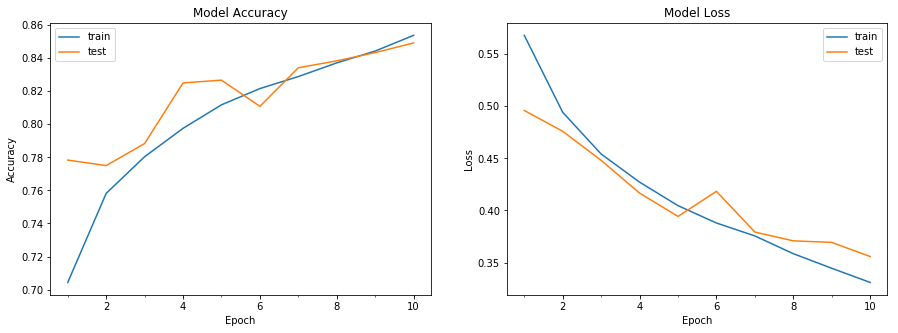

In [0]:
plot_model_history(hist_10)

In [0]:
Y_pred = model_cnn10.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
from sklearn.metrics import confusion_matrix
import pandas as pd

confusion_df = pd.DataFrame(confusion_matrix(np.argmax(y_test_c,axis=1),y_pred),
            columns=["Predicted Class " + str(class_name) for class_name in ['Electronics','Furniture']],
            index = ["Class " + str(class_name) for class_name in ['Electronics','Furniture']])

print(confusion_df)

NameError: ignored

In [0]:
from sklearn.metrics import classification_report
target_names = ['Electronics','Furniture']
print(classification_report(np.argmax(y_test_c,axis=1), y_pred, target_names=target_names))

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
labels = np.unique(y)
#cm = confusion_matrix(y, predicted,labels)

plt.figure(figsize = (6,6))
#df_cm = pd.DataFrame(cm, index = [i for i in labels],
#                 columns = [i for i in labels])

ax=sn.heatmap(confusion_df, annot=True)
